<a href="https://colab.research.google.com/github/lalitmendhule/Deep-Learning/blob/main/Prac1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow scikit-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
# Step 1: Load the data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Build the MLP model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6171 - loss: 0.9541 - val_accuracy: 0.4583 - val_loss: 1.0090
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6372 - loss: 0.9044 - val_accuracy: 0.5417 - val_loss: 0.9597
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6680 - loss: 0.8324 - val_accuracy: 0.6667 - val_loss: 0.9158
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6756 - loss: 0.7804 - val_accuracy: 0.6667 - val_loss: 0.8725
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.7053 - val_accuracy: 0.6667 - val_loss: 0.8304
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.7069 - val_accuracy: 0.7083 - val_loss: 0.7842
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8090 - loss: 0.5943 - val_accuracy: 0.6667 - val_loss: 0.7454
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7229 - loss: 0.6077 - val_accuracy: 0.7083 - 

In [ ]:
# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0305

Test Accuracy: 1.00


In [ ]:
# Step 8: Predict
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("\nSample Predictions:")
for i in range(5):
    print(f"Predicted: {iris.target_names[predicted_classes[i]]} | Actual: {iris.target_names[true_classes[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Sample Predictions:
Predicted: versicolor | Actual: versicolor
Predicted: setosa | Actual: setosa
Predicted: virginica | Actual: virginica
Predicted: versicolor | Actual: versicolor
Predicted: versicolor | Actual: versicolor


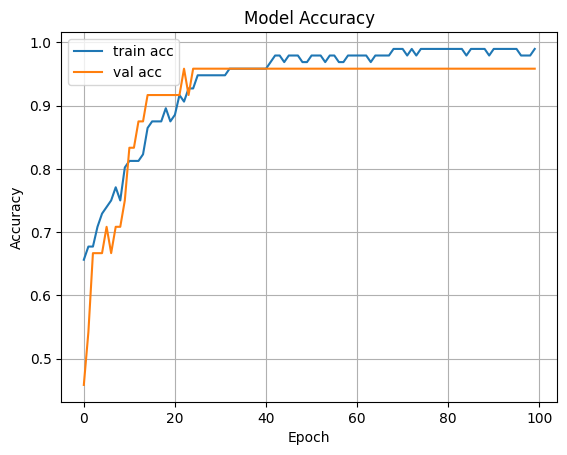

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
